<a href="https://colab.research.google.com/github/Aditya-singh32/My_projects/blob/main/TensorFlowCourse02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard Library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Project Especific Imports
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [ ]:
# Let's load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Let's convert the string values to numeric values by the help of one-hot encoding.

In [ ]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
df.shape

(1338, 12)

### Let's build a Neural Network and make some predictions

In [ ]:
X = df.drop(['charges'],axis=1)
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation='relu',input_shape=[11,]),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(75,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(tf.keras.optimizers.Adam(learning_rate=.001), loss='mse', metrics='mae')

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 14ms/step - loss: 246208512.0000 - mae: 11441.0654
Epoch 2/100
34/34 [==============================] - 1s 15ms/step - loss: 133306168.0000 - mae: 8677.8633
Epoch 3/100
34/34 [==============================] - 0s 14ms/step - loss: 127083632.0000 - mae: 9015.7217
Epoch 4/100
34/34 [==============================] - 1s 15ms/step - loss: 122525488.0000 - mae: 8905.6377
Epoch 5/100
34/34 [==============================] - 0s 14ms/step - loss: 120680032.0000 - mae: 8715.8359
Epoch 6/100
34/34 [==============================] - 1s 15ms/step - loss: 117139632.0000 - mae: 8366.0527
Epoch 7/100
34/34 [==============================] - 1s 15ms/step - loss: 100404088.0000 - mae: 7947.2383
Epoch 8/100
34/34 [==============================] - 1s 18ms/step - loss: 76275704.0000 - mae: 6771.3989
Epoch 9/100
34/34 [==============================] - 1s 21ms/step - loss: 50365588.0000 - mae: 4926.3701
Epoch 10/100
34/34 [===========================

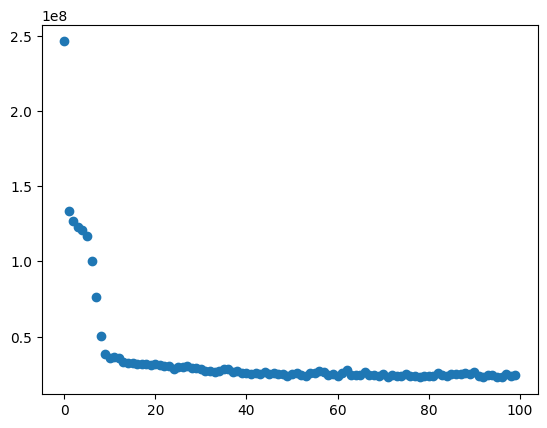

In [ ]:
plt.scatter([i for i in range(100)], model.history.history['loss'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df.drop(["charges"],axis=1))

In [ ]:
df2.shape

(1338, 11)

In [ ]:
col = df.drop(['charges'],axis=1).columns
df3 = pd.DataFrame(df2, columns=col)
df3

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X2 = df3
y2 = df['charges']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=.2,random_state=42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation='relu',input_shape=[11,]),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(75,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

model2.compile(tf.keras.optimizers.Adam(learning_rate=.001), loss='mse', metrics='mae')

model2.fit(X2_train,y2_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 15ms/step - loss: 289715072.0000 - mae: 12146.9795
Epoch 2/100
34/34 [==============================] - 1s 15ms/step - loss: 108992504.0000 - mae: 8329.9316
Epoch 3/100
34/34 [==============================] - 1s 15ms/step - loss: 52098496.0000 - mae: 5294.8130
Epoch 4/100
34/34 [==============================] - 0s 15ms/step - loss: 39719304.0000 - mae: 4212.6484
Epoch 5/100
34/34 [==============================] - 1s 15ms/step - loss: 37584404.0000 - mae: 4245.5039
Epoch 6/100
34/34 [==============================] - 1s 15ms/step - loss: 36560104.0000 - mae: 4032.1365
Epoch 7/100
34/34 [==============================] - 1s 15ms/step - loss: 35007936.0000 - mae: 3771.1570
Epoch 8/100
34/34 [==============================] - 1s 15ms/step - loss: 34110432.0000 - mae: 3858.3723
Epoch 9/100
34/34 [==============================] - 0s 15ms/step - loss: 33141364.0000 - mae: 3721.6238
Epoch 10/100
34/34 [==============================] 

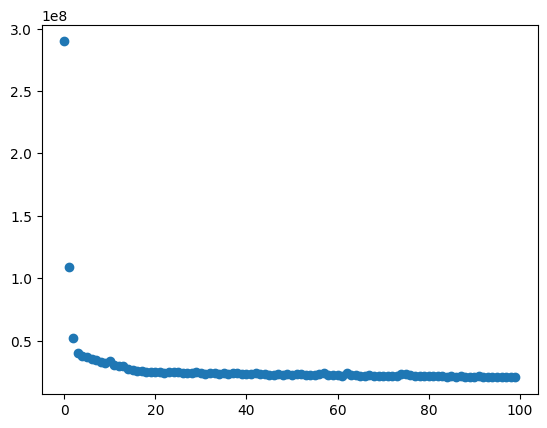

In [ ]:
plt.scatter([i for i in range(100)], model2.history.history['loss'])